In [1]:
# Fix figure.dpi
%matplotlib inline
# Display exactly the figure that will be saved
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.dpi']

100.0

### Figure 2.3 - Axes boundaries in polar projection

https://github.com/rougier/scientific-visualization-book/blob/master/code/coordinates/transforms-polar.py

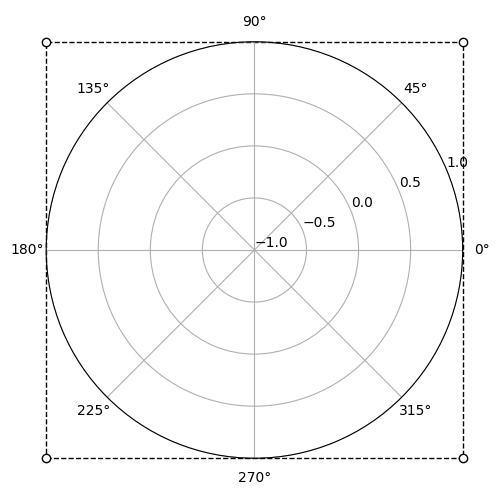

In [3]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: Creative Commons BY-NC-SA International 4.0
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection="polar")
ax.set_ylim(-1, 1), ax.set_yticks([-1, -0.5, 0, 0.5, 1])

FC_to_DC = ax.transData.inverted().transform
NDC_to_FC = ax.transAxes.transform
NDC_to_DC = lambda x: FC_to_DC(NDC_to_FC(x))

P = NDC_to_DC([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
plt.plot(
    P[:, 0],
    P[:, 1],
    clip_on=False,
    color="k",
    linewidth=1.0,
    linestyle="--",
    zorder=-10,
)
plt.scatter(P[:-1, 0], P[:-1, 1], clip_on=False, facecolor="w", edgecolor="k")

plt.tight_layout()
plt.savefig("../../figures/02-coordinates/transforms-polar.pdf")
plt.show()

### Figure 2.4 - Independent text positioning

https://github.com/rougier/scientific-visualization-book/blob/master/code/coordinates/transforms-letter.py

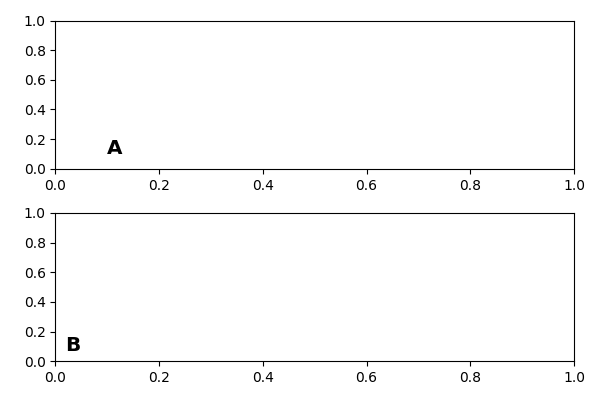

In [5]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: Creative Commons BY-NC-SA International 4.0
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import ScaledTranslation

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(2, 1, 1)
plt.text(
    0.1,
    0.1,
    "A",
    fontsize="x-large",
    weight="bold",
    ha="left",
    va="baseline",
    transform=ax.transAxes,
)

ax = fig.add_subplot(2, 1, 2)
dx, dy = 10 / fig.dpi, 10 / fig.dpi
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)

plt.text(
    0,
    0,
    "B",
    fontsize="x-large",
    weight="bold",
    ha="left",
    va="baseline",
    transform=ax.transAxes + offset,
)

plt.tight_layout()
plt.savefig("../../figures/02-coordinates/transforms-letter.pdf")
plt.show()

### Figure 2.5 - Blended transform

https://github.com/rougier/scientific-visualization-book/blob/master/code/coordinates/transforms-blend.py

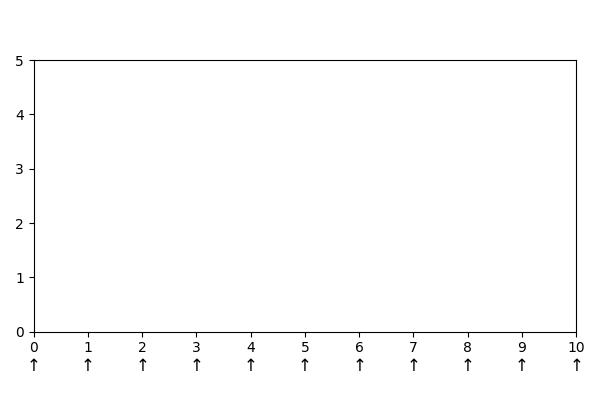

In [10]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: Creative Commons BY-NC-SA International 4.0
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory, ScaledTranslation

fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.set_xlim(0, 10)
ax.set_xticks(range(11))
ax.set_ylim(0, 5)
ax.set_xticks(range(11))

point = 1 / 72
fontsize = 12
dx, dy = 0, -1.5 * fontsize * point
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
transform = blended_transform_factory(ax.transData, ax.transAxes + offset)

for x in range(11):
    plt.text(x, 0, "↑", transform=transform, ha="center", va="top", fontsize=fontsize)

plt.tight_layout()
plt.savefig("../../figures/02-coordinates/transforms-blend.pdf")
plt.show()